In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import re, string
import random 

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag 
from PIL import Image 
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [4]:
df = pd.read_csv("ios15tweets.csv")
df = pd.DataFrame(df['Text'])
df

,Text
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...
1,"@MarllosP Aliás, correção: tirei ele da tomada..."
2,@XavierNaxa Ya Benar... Versi iOS 14.6 menyeba...
3,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ..."
4,"@thassius Oi boa noite, já sou inscrito no pro..."
...,...
996,La advertencia de Apple sobre la beta de iOS 1...
997,How to downgrade from iOS 15 beta to iOS 14 - ...
998,Apple lanza una versión actualizada de la segu...
999,@AppleSupport everyone received ios 15 beta. W...


In [5]:
# Cleaning the tweets

# converting to lowercase
df['clean_text'] = df['Text'].str.lower()

# removing links,urls
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x, flags=re.MULTILINE))

# removing html reference characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'&[a-z]+;', '', x))

# removing user @ references and '#' from tweet
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\@\w+|\#|\d+', '', x))

# removing characters that aren't letters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#@]", '', x))

# removing all the special characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\W',' ', x))

# removing all single characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

# removing twitter handles
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@mention', '', x))

df

,Text,clean_text
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...
2,@XavierNaxa Ya Benar... Versi iOS 14.6 menyeba...,ya benar versi ios menyebabkan bateri menjad...
3,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak
4,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...
...,...,...
996,La advertencia de Apple sobre la beta de iOS 1...,la advertencia de apple sobre la beta de ios ...
997,How to downgrade from iOS 15 beta to iOS 14 - ...,how to downgrade from ios beta to ios tomac
998,Apple lanza una versión actualizada de la segu...,apple lanza una versin actualizada de la segun...
999,@AppleSupport everyone received ios 15 beta. W...,everyone received ios beta where mine


In [6]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['clean_text'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list
df = df[df['sentiment'] != 'Neutral']
df = df.reset_index(drop=True)
df

,Text,clean_text,sentiment,sentiment score
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...,Positive,0.3182
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...,Negative,-0.2960
2,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak,Positive,0.5574
3,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...,Negative,-0.5267
4,. @iPhoneinCanada I have a cool juicy story fo...,have cool juicy story for you to report on fi...,Negative,-0.1779
...,...,...,...,...
360,@NaturalistDevil @HSBC_IN iOS is in beta. Like...,ios is in beta like any app they wont be abl...,Positive,0.6369
361,If Safari in iOS 15 ships this fall in its cur...,if safari in ios ships this fall in its curre...,Positive,0.3384
362,iOS/iPadOS 15 public betas have plenty of bugs...,ios ipados public betas have plenty of bugs b...,Positive,0.9702
363,@fournelmickey Yes sir ! iOS 15 Bêta 2,yes sir ios bta,Positive,0.4019


In [7]:
# tokenise string
df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)
df

,Text,clean_text,sentiment,sentiment score,tokenise
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...,Positive,0.3182,"[yeah, especially, with, ios, beta, this, baby..."
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...,Negative,-0.2960,"[alis, correo, tirei, ele, da, tomada, sbado, ..."
2,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak,Positive,0.5574,"[hahaha, im, on, ios, beta, so, cant, jailbreak]"
3,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...,Negative,-0.5267,"[oi, boa, noite, sou, inscrito, no, programa, ..."
4,. @iPhoneinCanada I have a cool juicy story fo...,have cool juicy story for you to report on fi...,Negative,-0.1779,"[have, cool, juicy, story, for, you, to, repor..."
...,...,...,...,...,...
360,@NaturalistDevil @HSBC_IN iOS is in beta. Like...,ios is in beta like any app they wont be abl...,Positive,0.6369,"[ios, is, in, beta, like, any, app, they, wont..."
361,If Safari in iOS 15 ships this fall in its cur...,if safari in ios ships this fall in its curre...,Positive,0.3384,"[if, safari, in, ios, ships, this, fall, in, i..."
362,iOS/iPadOS 15 public betas have plenty of bugs...,ios ipados public betas have plenty of bugs b...,Positive,0.9702,"[ios, ipados, public, betas, have, plenty, of,..."
363,@fournelmickey Yes sir ! iOS 15 Bêta 2,yes sir ios bta,Positive,0.4019,"[yes, sir, ios, bta]"


In [8]:
# initiate nltk lemmatiser
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words
df['lemmatise'] = df['tokenise'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...,Positive,0.3182,"[yeah, especially, with, ios, beta, this, baby...","[yeah, especially, with, io, beta, this, baby,..."
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...,Negative,-0.2960,"[alis, correo, tirei, ele, da, tomada, sbado, ...","[ali, correo, tirei, ele, da, tomada, sbado, i..."
2,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak,Positive,0.5574,"[hahaha, im, on, ios, beta, so, cant, jailbreak]","[hahaha, im, on, io, beta, so, cant, jailbreak]"
3,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...,Negative,-0.5267,"[oi, boa, noite, sou, inscrito, no, programa, ...","[oi, boa, noite, sou, inscrito, no, programa, ..."
4,. @iPhoneinCanada I have a cool juicy story fo...,have cool juicy story for you to report on fi...,Negative,-0.1779,"[have, cool, juicy, story, for, you, to, repor...","[have, cool, juicy, story, for, you, to, repor..."
...,...,...,...,...,...,...
360,@NaturalistDevil @HSBC_IN iOS is in beta. Like...,ios is in beta like any app they wont be abl...,Positive,0.6369,"[ios, is, in, beta, like, any, app, they, wont...","[io, is, in, beta, like, any, app, they, wont,..."
361,If Safari in iOS 15 ships this fall in its cur...,if safari in ios ships this fall in its curre...,Positive,0.3384,"[if, safari, in, ios, ships, this, fall, in, i...","[if, safari, in, io, ship, this, fall, in, it,..."
362,iOS/iPadOS 15 public betas have plenty of bugs...,ios ipados public betas have plenty of bugs b...,Positive,0.9702,"[ios, ipados, public, betas, have, plenty, of,...","[io, ipados, public, beta, have, plenty, of, b..."
363,@fournelmickey Yes sir ! iOS 15 Bêta 2,yes sir ios bta,Positive,0.4019,"[yes, sir, ios, bta]","[yes, sir, io, bta]"


In [9]:
# initiate stopwords from nltk
stop_words = stopwords.words('english')

# add additional missing terms
user_stop_words = ['ios', 'io', 'apps','app','android','public','private', 'new','ios15','beta','15']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets

# remove stopwords
df['remove_stopwords'] = df['lemmatise'].apply(lambda x: [item for item in x if item not in stop_words])

df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...,Positive,0.3182,"[yeah, especially, with, ios, beta, this, baby...","[yeah, especially, with, io, beta, this, baby,...","[yeah, especially, baby, go, battery, like, dr..."
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...,Negative,-0.2960,"[alis, correo, tirei, ele, da, tomada, sbado, ...","[ali, correo, tirei, ele, da, tomada, sbado, i...","[ali, correo, tirei, ele, da, tomada, sbado, a..."
2,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak,Positive,0.5574,"[hahaha, im, on, ios, beta, so, cant, jailbreak]","[hahaha, im, on, io, beta, so, cant, jailbreak]","[hahaha, im, cant, jailbreak]"
3,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...,Negative,-0.5267,"[oi, boa, noite, sou, inscrito, no, programa, ...","[oi, boa, noite, sou, inscrito, no, programa, ...","[oi, boa, noite, sou, inscrito, programa, de, ..."
4,. @iPhoneinCanada I have a cool juicy story fo...,have cool juicy story for you to report on fi...,Negative,-0.1779,"[have, cool, juicy, story, for, you, to, repor...","[have, cool, juicy, story, for, you, to, repor...","[cool, juicy, story, report, first, adding, ac..."
...,...,...,...,...,...,...,...
360,@NaturalistDevil @HSBC_IN iOS is in beta. Like...,ios is in beta like any app they wont be abl...,Positive,0.6369,"[ios, is, in, beta, like, any, app, they, wont...","[io, is, in, beta, like, any, app, they, wont,...","[like, wont, able, support, release, common, s..."
361,If Safari in iOS 15 ships this fall in its cur...,if safari in ios ships this fall in its curre...,Positive,0.3384,"[if, safari, in, ios, ships, this, fall, in, i...","[if, safari, in, io, ship, this, fall, in, it,...","[safari, ship, fall, current, form, could, wel..."
362,iOS/iPadOS 15 public betas have plenty of bugs...,ios ipados public betas have plenty of bugs b...,Positive,0.9702,"[ios, ipados, public, betas, have, plenty, of,...","[io, ipados, public, beta, have, plenty, of, b...","[ipados, plenty, bug, happy, try, finally, lib..."
363,@fournelmickey Yes sir ! iOS 15 Bêta 2,yes sir ios bta,Positive,0.4019,"[yes, sir, ios, bta]","[yes, sir, io, bta]","[yes, sir, bta]"


In [10]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = [word for (word, tag) in pos_tag(tweet) if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [11]:
df['Tweets_Adjectives'] = df['remove_stopwords'].apply(getAdjectives)

In [12]:
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords,Tweets_Adjectives
0,@Wolfpackmiitomo Yeah especially with iOS 15 b...,yeah especially with ios beta this baby goes...,Positive,0.3182,"[yeah, especially, with, ios, beta, this, baby...","[yeah, especially, with, io, beta, this, baby,...","[yeah, especially, baby, go, battery, like, dr...",baby
1,"@MarllosP Aliás, correção: tirei ele da tomada...",alis correo tirei ele da tomada sbado ios at...,Negative,-0.2960,"[alis, correo, tirei, ele, da, tomada, sbado, ...","[ali, correo, tirei, ele, da, tomada, sbado, i...","[ali, correo, tirei, ele, da, tomada, sbado, a...",dava
2,"@FCE365 Hahaha I’m on iOS 15 beta, so I can’t ...",hahaha im on ios beta so cant jailbreak,Positive,0.5574,"[hahaha, im, on, ios, beta, so, cant, jailbreak]","[hahaha, im, on, io, beta, so, cant, jailbreak]","[hahaha, im, cant, jailbreak]",
3,"@thassius Oi boa noite, já sou inscrito no pro...",oi boa noite sou inscrito no programa de beta...,Negative,-0.5267,"[oi, boa, noite, sou, inscrito, no, programa, ...","[oi, boa, noite, sou, inscrito, no, programa, ...","[oi, boa, noite, sou, inscrito, programa, de, ...",oi noite inscrito instalar
4,. @iPhoneinCanada I have a cool juicy story fo...,have cool juicy story for you to report on fi...,Negative,-0.1779,"[have, cool, juicy, story, for, you, to, repor...","[have, cool, juicy, story, for, you, to, repor...","[cool, juicy, story, report, first, adding, ac...",cool give
...,...,...,...,...,...,...,...,...
360,@NaturalistDevil @HSBC_IN iOS is in beta. Like...,ios is in beta like any app they wont be abl...,Positive,0.6369,"[ios, is, in, beta, like, any, app, they, wont...","[io, is, in, beta, like, any, app, they, wont,...","[like, wont, able, support, release, common, s...",able common
361,If Safari in iOS 15 ships this fall in its cur...,if safari in ios ships this fall in its curre...,Positive,0.3384,"[if, safari, in, ios, ships, this, fall, in, i...","[if, safari, in, io, ship, this, fall, in, it,...","[safari, ship, fall, current, form, could, wel...",safari current mobile next
362,iOS/iPadOS 15 public betas have plenty of bugs...,ios ipados public betas have plenty of bugs b...,Positive,0.9702,"[ios, ipados, public, betas, have, plenty, of,...","[io, ipados, public, beta, have, plenty, of, b...","[ipados, plenty, bug, happy, try, finally, lib...",ipados happy library label side
363,@fournelmickey Yes sir ! iOS 15 Bêta 2,yes sir ios bta,Positive,0.4019,"[yes, sir, ios, bta]","[yes, sir, io, bta]","[yes, sir, bta]",


In [13]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_list = df['Tweets_Adjectives'].tolist()
list_no_dup = []
[list_no_dup.append(x) for x in tweets_long_list if x not in list_no_dup]
tweets_long_string = " ".join(list_no_dup)

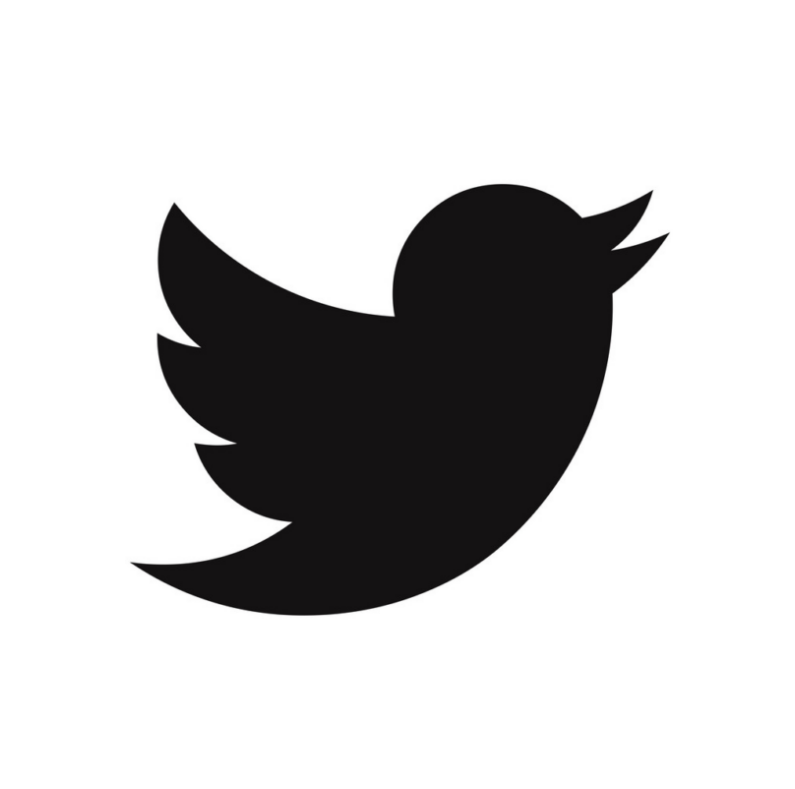

In [14]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() 
fig.set_figwidth(14) 
fig.set_figheight(18)

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') 
plt.show() 


In [15]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

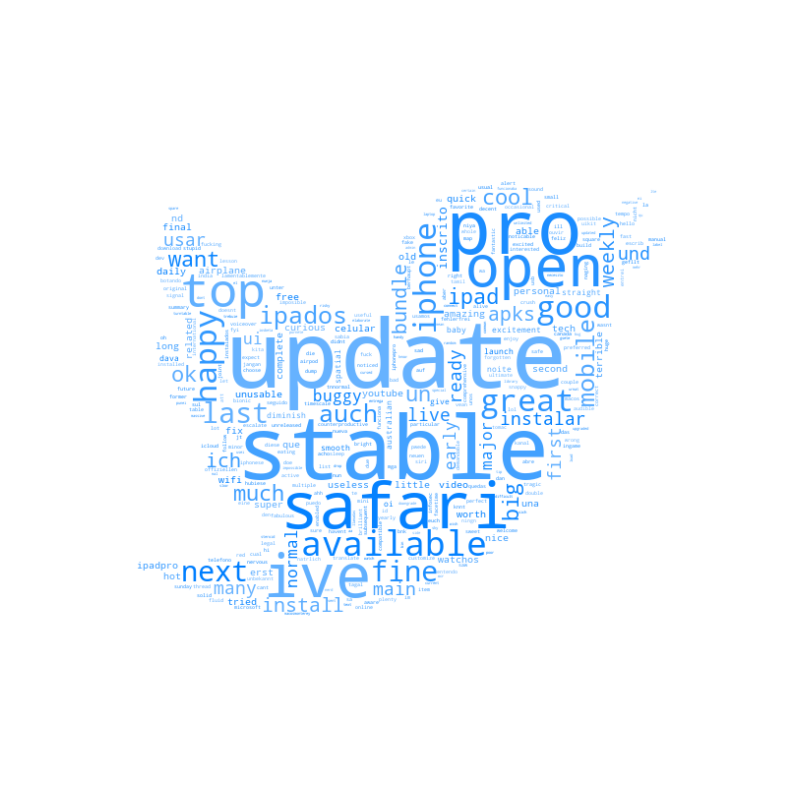

In [16]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  
fig.set_figheight(18)  

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


In [17]:
# Combine all words into a list
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [18]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df1.columns = ['Words', 'Count']
df1.sort_values(by='Count', ascending=False, inplace=True)

In [19]:
df1.head(10)

,Words,Count
89,top,32
64,pro,28
70,update,17
42,stable,14
94,mobile,10
130,apks,10
236,amazing,9
229,weekly,9
26,ipad,8
67,iphone,8


In [20]:
# See quick results of the Sentiment Analysis
df['sentiment'].value_counts()

Positive    264
Negative    101
Name: sentiment, dtype: int64

In [21]:
# Create dataframe for Count of Sentiment Categories
bar_chart = df['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()


In [22]:
bar_chart # Display dataframe

,sentiment,Total Tweets
0,Positive,264
1,Negative,101


In [23]:
bar_chart.iplot(kind = 'bar', x = 'sentiment', y = 'Total Tweets', color = 'rgb(12, 128, 128)')